In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

## Enrique's code starts here

In [3]:
# read in the data
employment_data = pd.read_csv("Resources/Average annual hours actually worked.csv")
happiness_data = pd.read_csv("Resources/World Happiness Report 2018.csv")

In [4]:
# clean up employment_data

# get only relevant rows
employment_data = employment_data[["Country", "Employment status", "Time", "Value"]]

# get only total employment
total_employment = employment_data.loc[employment_data["Employment status"] == "Total employment"]

# get only 2018 data
total_employment_2018 = total_employment.loc[total_employment["Time"] == 2018]

# sort by country
total_employment_2018 = total_employment_2018.sort_values(by="Country")

# rename columns and get a final dataframe
total_employment_2018 = total_employment_2018[["Country", "Value"]]
total_employment_2018 = total_employment_2018.rename(columns={"Value": "Avg Hours Worked per Worker"})

In [5]:
# clean up happiness_data

# rename country column for merging
happiness_data = happiness_data.rename(
    columns={
        "Country or region": "Country",
        "Score": "Happiness Score"
    }
)

In [6]:
# merge happiness data into the employment data
data = pd.merge(total_employment_2018, happiness_data, how="left", on="Country")

# clean up merged data
data = data.dropna()

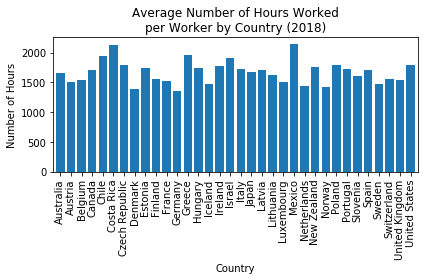

In [7]:
# Plot Average Number of Hours Worked per Worker by Country

# countries list and tick locations
countries = data["Country"].tolist()
tick_locations = np.arange(len(countries))

# dataframe for plot
hours_worked = data[["Country", "Avg Hours Worked per Worker"]]

# plot the data
hours_worked.plot(kind="bar", legend=False, width=.8)

# assign xticks
plt.xticks(tick_locations, countries, rotation=90)

# title and labels
plt.title(f"Average Number of Hours Worked\n"
          f"per Worker by Country (2018)")
plt.xlabel("Country")
plt.ylabel("Number of Hours")

# display plot
plt.tight_layout()
plt.show()

34


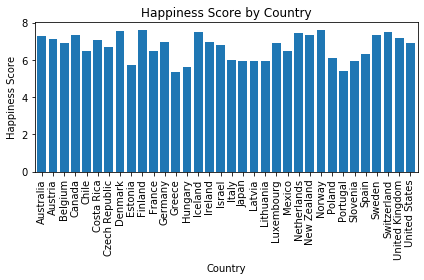

In [8]:
# Plot Happiness Score by Country

# countries list and tick locations
countries = data["Country"].tolist()
tick_locations = np.arange(len(countries))

# dataframe for plot
happiness_scores = data[["Country", "Happiness Score"]]

# plot the data
happiness_scores.plot(kind="bar", legend=False, width=.8)

# assign xticks
plt.xticks(tick_locations, countries, rotation=90)

# title and labels
plt.title("Happiness Score by Country")
plt.xlabel("Country")
plt.ylabel("Happiness Score")

print(len(countries))
# display plot
plt.tight_layout()
plt.show()

The r-squared value is: 0.18


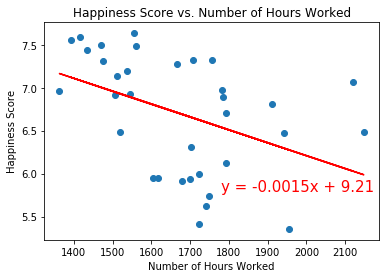

In [9]:
# Regression Analysis for Question #1
# Hypothesis: Countries with lower working hours will tend to have a higher happiness score.

# define independent and dependent variables
independent_variable = "Avg Hours Worked per Worker"
dependent_variable = "Happiness Score"

# define title and labels
xlabel = "Number of Hours Worked"
ylabel = "Happiness Score"
title = f"{ylabel} vs. {xlabel}"

# create dataframe
hours_and_happiness = data[["Country", independent_variable, dependent_variable]]

# define x and y values
x_values = hours_and_happiness[independent_variable]
y_values = hours_and_happiness[dependent_variable]

# run regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression values
regress_values = x_values * slope + intercept

# create line equation
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 2)}"

# plot the data
plt.scatter(x_values, y_values)

# plot the regression line
plt.plot(x_values, regress_values, "r-")

# add equation
plt.annotate(line_eq, (1780, 5.8), fontsize=15, color="red")

# add title and labels to plot
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# print summary data
print(f"The r-squared value is: {round(rvalue**2, 2)}")

# display the plot
plt.show()

In [10]:
#create categories for statistical analysis
labels = ["low", "medium", "high"]
hours_and_happiness["Group"] = pd.qcut(hours_and_happiness["Avg Hours Worked per Worker"], q=3, labels=labels)

In [27]:
# get happiness scores for each category
low_hours_happiness = hours_and_happiness.loc[hours_and_happiness["Group"] == "low", "Happiness Score"]
med_hours_happiness = hours_and_happiness.loc[hours_and_happiness["Group"] == "medium", "Happiness Score"]
high_hours_happiness = hours_and_happiness.loc[hours_and_happiness["Group"] == "high", "Happiness Score"]

# get the statistic value for each test
low_vs_med_statistic = stats.ttest_ind(low_hours_happiness, med_hours_happiness).statistic
low_vs_high_statistic = stats.ttest_ind(low_hours_happiness, high_hours_happiness).statistic
med_vs_high_statistic = stats.ttest_ind(med_hours_happiness, high_hours_happiness).statistic

# get the pvalue for each test
low_vs_med_pvalue = stats.ttest_ind(low_hours_happiness, med_hours_happiness).pvalue
low_vs_high_pvalue = stats.ttest_ind(low_hours_happiness, high_hours_happiness).pvalue
med_vs_high_pvalue = stats.ttest_ind(med_hours_happiness, high_hours_happiness).pvalue

# initial print statement
print("=============================================================================================\n"
      "Statistical Analysis:\n\n"
      "\tIndependent Student's t-test for Happiness vs. Average Hours Worked per Worker.\n\n"
      "Null Hypothesis:\n\n"
      "\tIf number of hours worked has no impact on happiness score, then the mean happiness\n"
      "score accross all three groups will be the same.\n"
      "=============================================================================================\n")

# test 1 print statements
print("---------------------------------------------------------------------------------------------\n"
      "Test 1: Lowest Working Hours Group vs Medium Working Hours Group\n\n"
      f"\tStatistic = {low_vs_med_statistic}\n"
      f"\tP-value = {low_vs_med_pvalue}\n")
if low_vs_med_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_med_pvalue,4)} is lower than 0.05, we choose to reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_med_pvalue,4)} is greater than 0.05, we choose not to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------------")

# test 2 print statements
print("Test 2: Lowest Working Hours Group vs Highest Working Hours Group\n\n"
      f"\tStatistic = {low_vs_high_statistic}\n"
      f"\tP-value = {low_vs_high_pvalue}\n")
if low_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_high_pvalue,4)} is lower than 0.05, we choose to reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_high_pvalue,4)} is greater than 0.05, we choose not to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------------")

# test 3 print statements
print("Test 3: Medium Working Hours Group vs Highest Working Hours Group\n\n"
      f"\tStatistic = {med_vs_high_statistic}\n"
      f"\tP-value = {med_vs_high_pvalue}\n")
if med_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(med_vs_high_pvalue,4)} is lower than 0.05, we choose to reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(med_vs_high_pvalue,4)} is greater than 0.05, we choose not to reject the null hypothesis.")
print("---------------------------------------------------------------------------------------------\n")

print("=============================================================================================\n"
      "Conclusion\n\n"
      "\tIn our first test, we chose to reject the null hypothesis. We cannot say that the\n"
      "difference in working hours between the lowest working hours group and the medium working\n"
      "hours group has no effect on happiness score.\n\n"
      "\tOur second test demonstrates the same result. We cannot say that the difference in\n"
      "working hours between the lowest working hours group and the highest working hours group\n"
      "has no effect on happiness score.\n\n"
     "\tThe third test gave us different results. We chose to not reject the null hypothesis.\n"
      "The difference in working hours between the medium working hours group and the highest\n"
      "working hours group has no statistically significant effect on happiness score.\n"
     "=============================================================================================")

Statistical Analysis:

	Independent Student's t-test for Happiness vs. Average Hours Worked per Worker.

Null Hypothesis:

	If number of hours worked has no impact on happiness score, then the mean happiness
score accross all three groups will be the same.

---------------------------------------------------------------------------------------------
Test 1: Lowest Working Hours Group vs Medium Working Hours Group

	Statistic = 3.9761936952138623
	P-value = 0.0006877347120054227

Since our pvalue of 0.0007 is lower than 0.05, we choose to reject the null hypothesis.
---------------------------------------------------------------------------------------------
Test 2: Lowest Working Hours Group vs Highest Working Hours Group

	Statistic = 3.372641210383257
	P-value = 0.0028768966992223123

Since our pvalue of 0.0029 is lower than 0.05, we choose to reject the null hypothesis.
---------------------------------------------------------------------------------------------
Test 3: Medium Worki

### Enrique's code ends here

## Jake's code starts here

In [ ]:
#read in ILO data

ilo_data = pd.read_csv("Resources/ILOSTAT.csv")

#merge data frames
#You need to run Enrique's code before this cell to create happiness_data and rename the country column
ilo_happiness_df = pd.merge(ilo_data, happiness_data, on="Country")




ilo_happiness_df.head()

In [ ]:
#separate countries into income groups
low_income = ilo_happiness_df[ilo_happiness_df["Group"] == "Low income countries"]
low_mid_income = ilo_happiness_df[ilo_happiness_df["Group"] == "Lower-middle income countries"]
up_mid_income = ilo_happiness_df[ilo_happiness_df["Group"] == "Upper-middle income countries"]
high_income = ilo_happiness_df[ilo_happiness_df["Group"] == "High income countries"]

low_income_happiness = low_income["Happiness Score"]
low_mid_income_happiness = low_mid_income["Happiness Score"]
up_mid_income_happiness = up_mid_income["Happiness Score"]
high_income_happiness = high_income["Happiness Score"]

#calculate mean happiness score for each income group
low_income_mean = low_income_happiness.mean()
low_mid_income_mean = low_mid_income_happiness.mean()
up_mid_income_mean = up_mid_income_happiness.mean()
high_income_mean= high_income_happiness.mean()


#create dataframe with income groups and their mean happiness score
happiness_groups = pd.DataFrame({"Income Group": ["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"],
                                "Average Happiness Score": [low_income_mean, low_mid_income_mean, up_mid_income_mean, high_income_mean]})

happiness_groups

In [ ]:
#determine size of each group
print(f"Low Income: {len(low_income_happiness)}\n"
      f"Lower-Middle Income: {len(low_mid_income_happiness)}\n"
      f"Upper-Middle Income: {len(up_mid_income_happiness)}\n"
      f"High Income: {len(high_income_happiness)}")

In [ ]:
plt.bar(happiness_groups["Income Group"], happiness_groups["Average Happiness Score"], color='r', alpha=1, align="center")
plt.xticks(rotation=45)
plt.title(f"Average Happiness Score by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Average Happiness Score")
plt.show()

In [ ]:
#statistical testing

# get the statistic value for each test
low_vs_lowMid_statistic = stats.ttest_ind(low_income_happiness, low_mid_income_happiness).statistic
low_vs_upMid_statistic = stats.ttest_ind(low_income_happiness, up_mid_income_happiness).statistic
low_vs_high_statistic = stats.ttest_ind(low_income_happiness, high_income_happiness).statistic
lowMid_vs_upMid_statistic = stats.ttest_ind(low_mid_income_happiness, up_mid_income_happiness).statistic
lowMid_vs_high_statistic = stats.ttest_ind(low_mid_income_happiness, high_income_happiness).statistic
upMid_vs_high_statistic = stats.ttest_ind(up_mid_income_happiness, high_income_happiness).statistic

# get the pvalue for each test
low_vs_lowMid_pvalue = stats.ttest_ind(low_income_happiness, low_mid_income_happiness).pvalue
low_vs_upMid_pvalue = stats.ttest_ind(low_income_happiness, up_mid_income_happiness).pvalue
low_vs_high_pvalue = stats.ttest_ind(low_income_happiness, high_income_happiness).pvalue
lowMid_vs_upMid_pvalue = stats.ttest_ind(low_mid_income_happiness, up_mid_income_happiness).pvalue
lowMid_vs_high_pvalue = stats.ttest_ind(low_mid_income_happiness, high_income_happiness).pvalue
upMid_vs_high_pvalue = stats.ttest_ind(up_mid_income_happiness, high_income_happiness).pvalue

# initial print statement
print("=======================================================================================\n"
      "Statistical Analysis:\n\n"
      "\tIndependent Student's t-test for Average Happiness Score by ILO Income Group.\n\n"
      "Null Hypothesis:\n\n"
      "\tIf income group has no impact on happiness score, then the mean happiness\n"
      "score accross all four groups will be the same.\n"
      "=======================================================================================\n")

# test 1 print statements
print("---------------------------------------------------------------------------------------\n"
      "Test 1: Low Income Group vs Lower-Middle Income Group\n\n"
      f"\tStatistic = {low_vs_lowMid_statistic}\n"
      f"\tP-value = {low_vs_lowMid_pvalue}\n")
if low_vs_lowMid_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_lowMid_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_lowMid_pvalue,4)} is greater than 0.05, we cannot reject the null hypothesis.")
print("---------------------------------------------------------------------------------------")

# test 2 print statements
print("Test 2: Low Income Group vs Upper-Middle Income Group\n\n"
      f"\tStatistic = {low_vs_upMid_statistic}\n"
      f"\tP-value = {low_vs_upMid_pvalue}\n")
if low_vs_upMid_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_upMid_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_upMid_pvalue,4)} is greater than 0.05, we cannot reject the null hypothesis.")
print("---------------------------------------------------------------------------------------")

# test 3 print statements
print("Test 3: Low Income Group vs High Income Group\n\n"
      f"\tStatistic = {low_vs_high_statistic}\n"
      f"\tP-value = {low_vs_high_pvalue}\n")
if low_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(low_vs_high_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(low_vs_high_pvalue,4)} is greater than 0.05, we cannot reject the null hypothesis.")
print("---------------------------------------------------------------------------------------\n")

# test 4 print statements
print("---------------------------------------------------------------------------------------\n"
      "Test 1: Lower-Middle Income Group vs Upper-Middle Income Group\n\n"
      f"\tStatistic = {lowMid_vs_upMid_statistic}\n"
      f"\tP-value = {lowMid_vs_upMid_pvalue}\n")
if lowMid_vs_upMid_pvalue < 0.05:
    print(f"Since our pvalue of {round(lowMid_vs_upMid_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(lowMid_vs_upMid_pvalue,4)} is greater than 0.05, we cannot reject the null hypothesis.")
print("---------------------------------------------------------------------------------------")

# test 5 print statements
print("Test 2: Lower-Middle Income Group vs High Income Group\n\n"
      f"\tStatistic = {lowMid_vs_high_statistic}\n"
      f"\tP-value = {lowMid_vs_high_pvalue}\n")
if lowMid_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(lowMid_vs_high_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(lowMid_vs_high_pvalue,4)} is greater than 0.05, we cannot reject the null hypothesis.")
print("---------------------------------------------------------------------------------------")

# test 6 print statements
print("Test 3: Upper-Middle Income Group vs High Income Group\n\n"
      f"\tStatistic = {upMid_vs_high_statistic}\n"
      f"\tP-value = {upMid_vs_high_pvalue}\n")
if upMid_vs_high_pvalue < 0.05:
    print(f"Since our pvalue of {round(upMid_vs_high_pvalue,4)} is lower than 0.05, we must reject the null hypothesis.")
else:
    print(f"Since our pvalue of {round(upMid_vs_high_pvalue,4)} is greater than 0.05, we cannot reject the null hypothesis.")
print("---------------------------------------------------------------------------------------\n")

In [ ]:
#happiness score vs poverty rate

poverty_df = pd.DataFrame({"Country": ilo_happiness_df["Country"],
                          "Happiness Score": ilo_happiness_df["Happiness Score"]})

for row in poverty_df:
    poverty_df["Poverty Rate"] = ilo_happiness_df["Extremely poor"] + ilo_happiness_df["Moderately poor"]
    
poverty_df = poverty_df.dropna()

poverty_df

In [ ]:
# define x and y values
x_values = poverty_df["Poverty Rate"]
y_values = poverty_df["Happiness Score"]

# run regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression values
regress_values = x_values * slope + intercept

# create line equation
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 2)}"

# plot the data
plt.scatter(x_values, y_values)

# plot the regression line
plt.plot(x_values, regress_values, "r-")

# add equation
plt.annotate(line_eq, (39, 5.5), fontsize=15, color="red")

# add title and labels to plot
plt.title("Happiness Score vs. Poverty Rate")
plt.xlabel("Poverty Rate")
plt.ylabel("Happiness Score")

# print summary data
print(f"The r-squared value is: {round(rvalue**2, 2)}")
print(f"The p-value is: {round(pvalue, 2)}")

# display the plot
plt.show()

In [ ]:
#statistical testing

### Jake's code ends here

## Yee's code starts here

### Yee's code ends here